In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [35]:
def imshow(img):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [36]:
image_path = "state.png"  # Path to your uploaded image
image = cv2.imread(image_path)

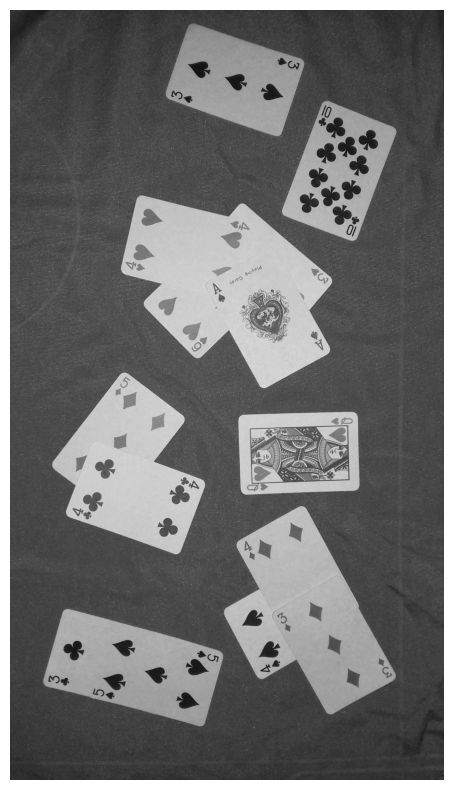

In [37]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(gray)

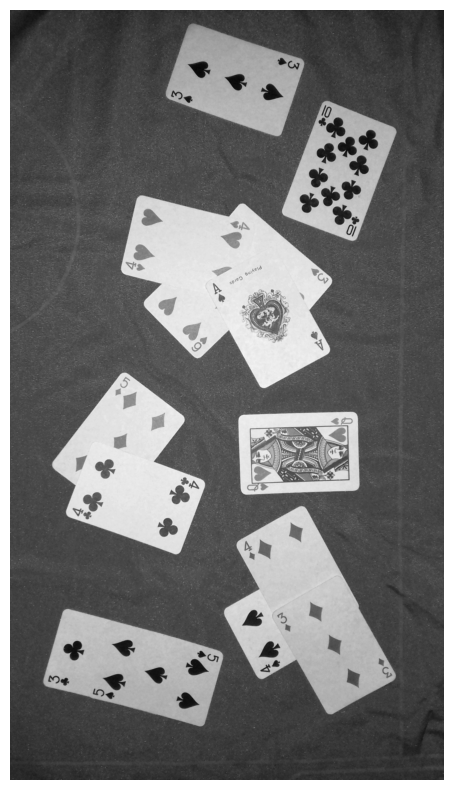

In [38]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
imshow(blur)

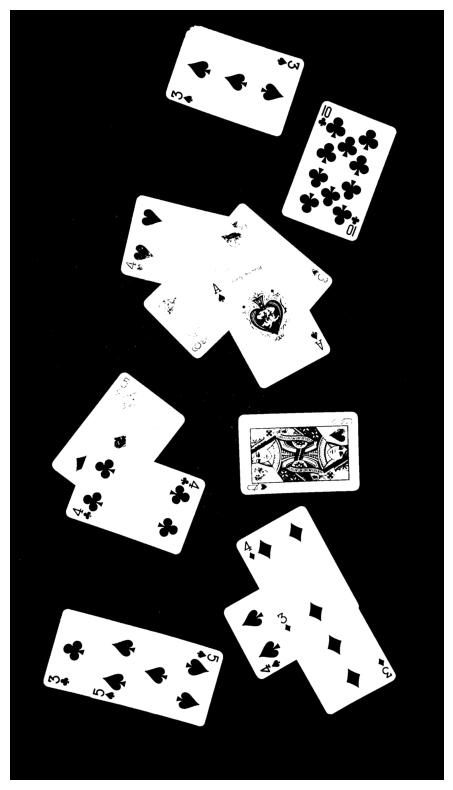

In [39]:
_, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh)

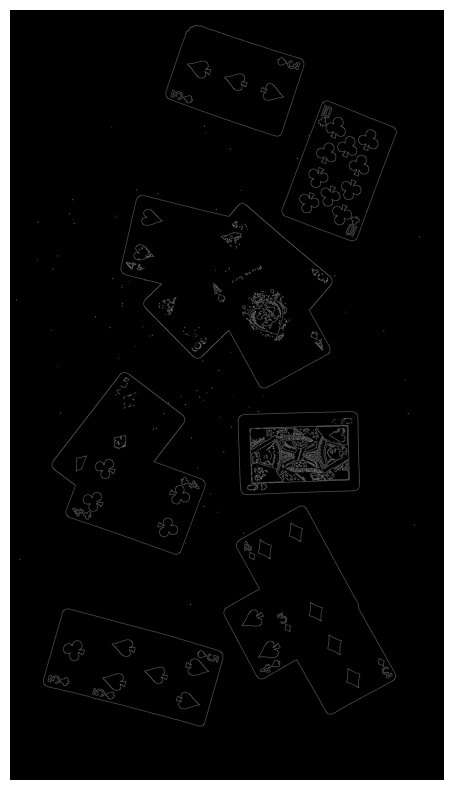

In [40]:
edges = cv2.Canny(thresh, 50, 150)
imshow(edges)

Contours detected: 7


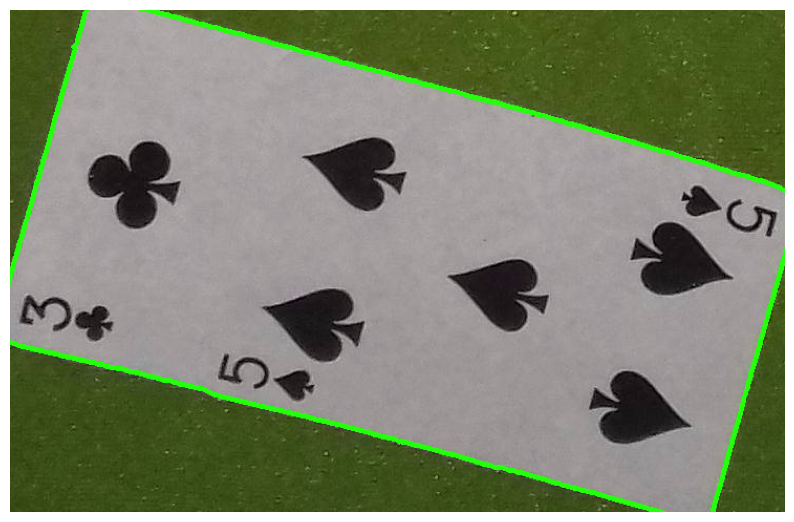

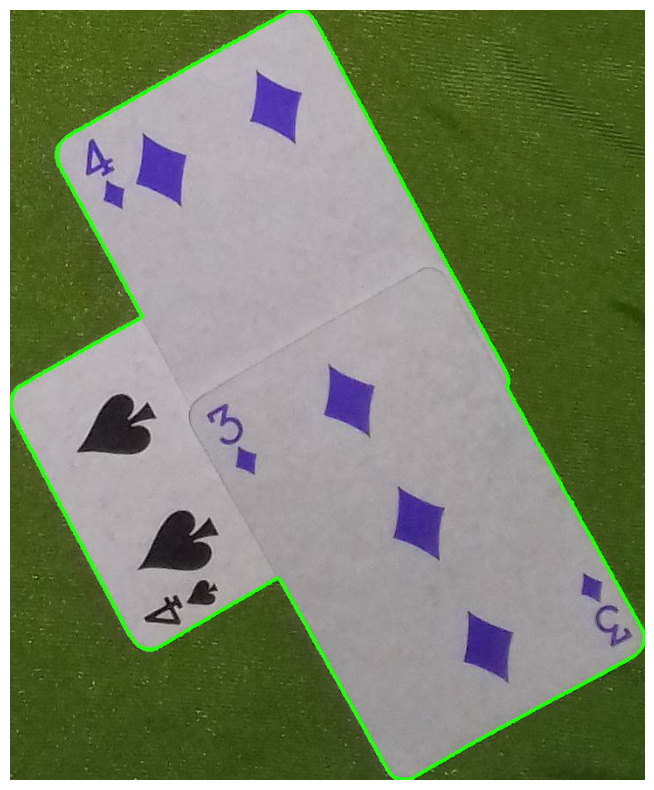

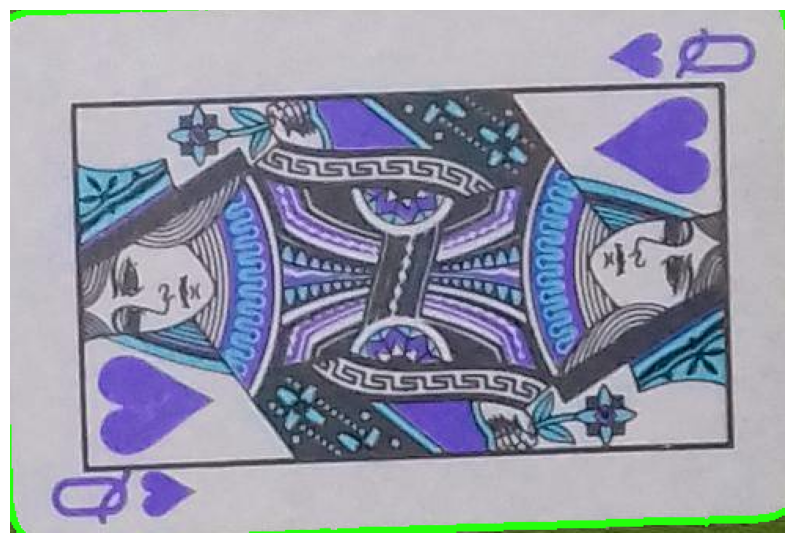

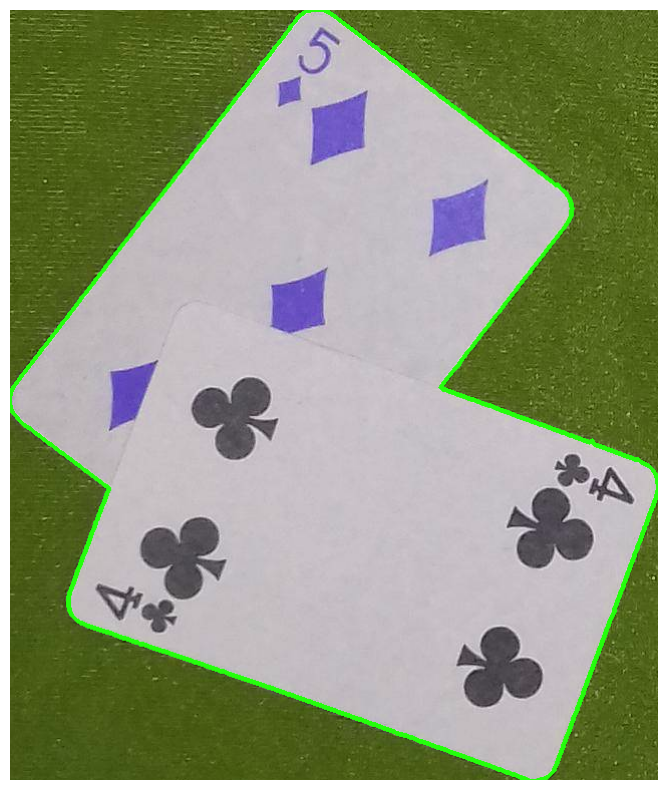

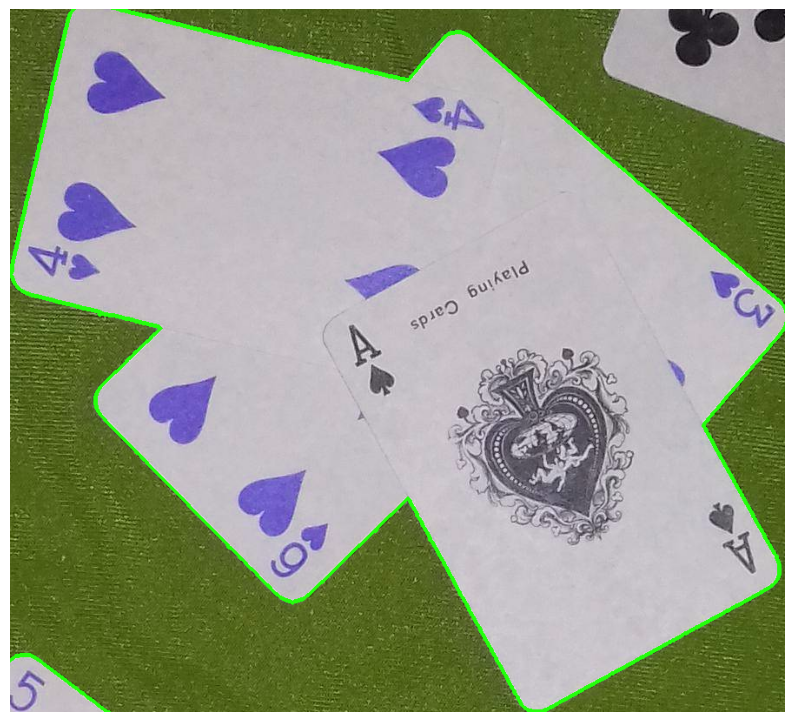

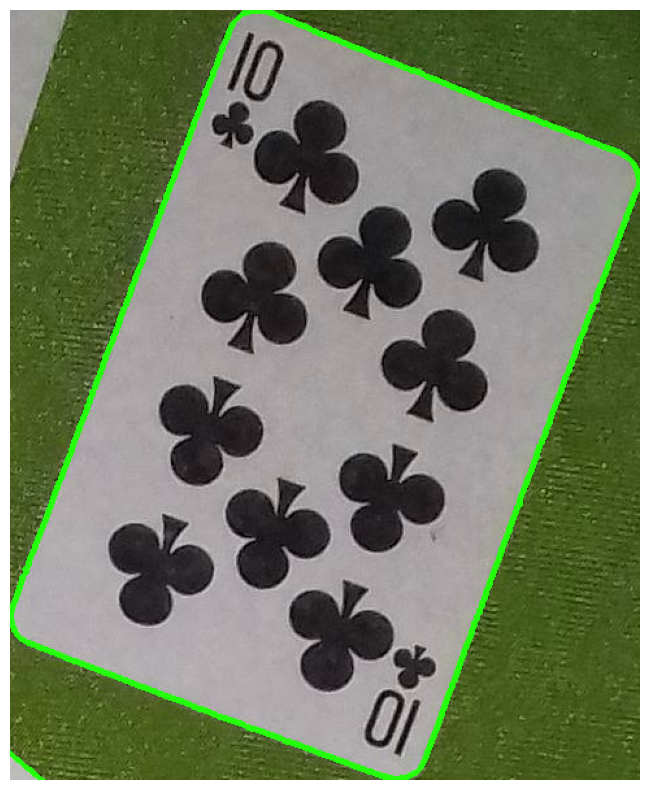

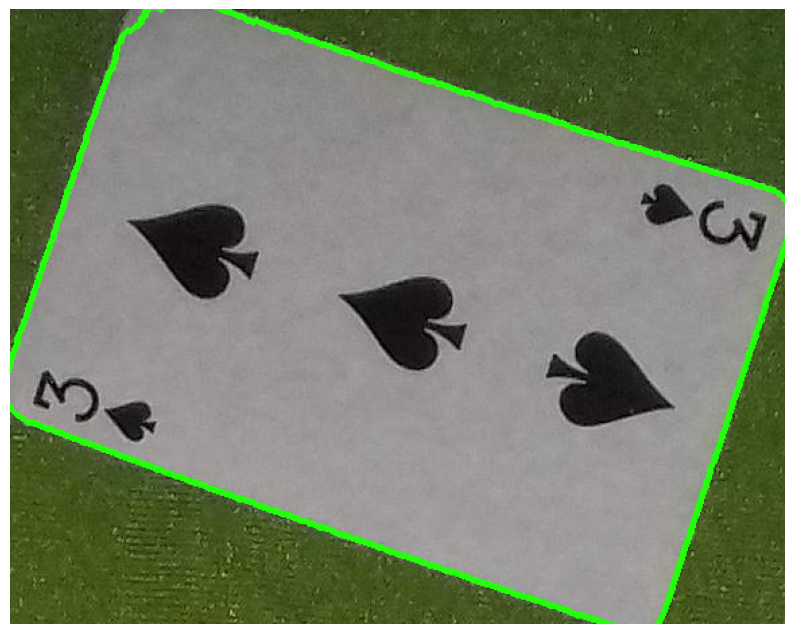

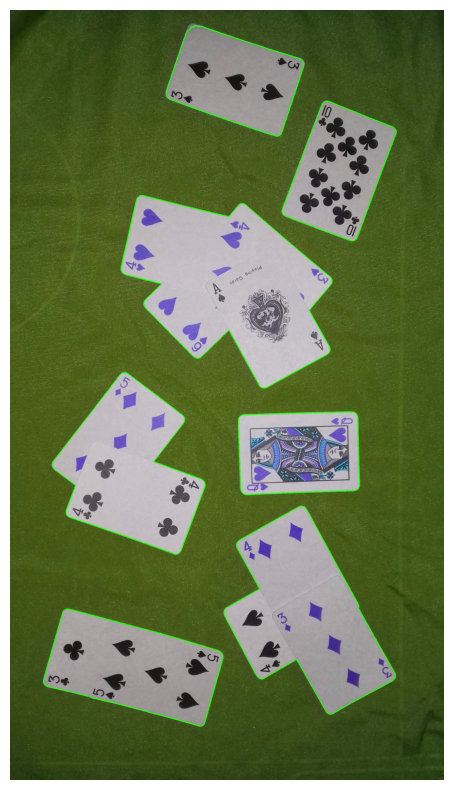

In [41]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
threshold_min_area = 400
number_of_contours = 0

for c in cnts:
    area = cv2.contourArea(c)
    if area > threshold_min_area:
        cv2.drawContours(image, [c], 0, (36,255,12), 3)
        number_of_contours += 1
        
        epsilon = 0.02 * cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, epsilon, True)
        
        x, y, w, h = cv2.boundingRect(approx)
        pile_image = image[y:y+h, x:x+w]
        
        imshow(pile_image)


print("Contours detected:", number_of_contours)

imshow(image)